# Gaussian Process Modeling of Light Curves

In this notebook we exemplify the modeling of the light curves using a Gaussian process (GP).

#### Index<a name="index"></a>
1. [Import Packages](#imports)
2. [Load the Original Dataset](#loadData)
3. [Fit Gaussian Processes](#gps)
    1. [Set Path to Save GP Files](#saveGps)
    2. [Compute GP Fits](#makeGps)
4. [Light Curve Visualization](#see)

## 1. Import Packages<a name="imports"></a>

In [1]:
import collections
import os
import pickle
import sys
import time

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from snmachine import gps, sndata
from utils.plasticc_pipeline import create_folder_structure, get_directories, load_dataset

No module named 'pymultinest'

                PyMultinest not found. If you would like to use, please install
                Mulitnest with 'sh install/multinest_install.sh; source
                install/setup.sh'
                


In [4]:
%config Completer.use_jedi = False  # enable autocomplete

#### Aestetic settings

In [5]:
%matplotlib inline

sns.set(font_scale=1.3, style="ticks")

## 2. Load Dataset<a name="loadData"></a>

First, **write** the path to the folder that contains the dataset we want to use, `folder_path`.

In [6]:
folder_path = '../snmachine/example_data'

Then, **write** in `data_file_name` the name of the file where your dataset is saved.

In this notebook we use the dataset saved in [2_preprocess_data](2_preprocess_data.ipynb).

In [7]:
data_file_name = 'example_dataset_gapless50.pckl'

Load the dataset.

In [8]:
data_path = os.path.join(folder_path, data_file_name)
dataset = load_dataset(data_path)

Opening from binary pickle
Dataset loaded from pickle file as: <snmachine.sndata.PlasticcData object at 0x7fca47352150>


## 3. Fit Gaussian Processes<a name="gps"></a>

### 3.1. Set Path to Save GP Files<a name="saveGps"></a>

We can now generate a folder structure to neatly save the files. Otherwise, you can directly write the path to the folder to save the GP files in `saved_gps_path`.

**<font color=Orange>A)</font>** Generate the folder structure.

**Write** the name of the folder you want in `analysis_name`. 

In [9]:
analysis_name = data_file_name[:-5]
analysis_name

'example_dataset_gapless50'

Create the folder structure.

In [10]:
create_folder_structure(folder_path, analysis_name)


                Folders already exist with this analysis name.

                Are you sure you would like to proceed, this will overwrite the
                example_dataset_gapless50 folder [Y/n]
                
Y
Overwriting existing folder..


See the folder structure.

In [11]:
directories = get_directories(folder_path, analysis_name) 
directories

{'analysis_directory': '../snmachine/example_data/example_dataset_gapless50',
 'features_directory': '../snmachine/example_data/example_dataset_gapless50/wavelet_features',
 'classifications_directory': '../snmachine/example_data/example_dataset_gapless50/classifications',
 'intermediate_files_directory': '../snmachine/example_data/example_dataset_gapless50/intermediate_files',
 'plots_directory': '../snmachine/example_data/example_dataset_gapless50/plots'}

Set the path to the folder to save the GP files.

In [12]:
path_saved_gps = directories['intermediate_files_directory']

**<font color=Orange>B)</font>** Directly choose where to save the GP files.

**Write** the path to the folder to save the GP files in `saved_gps_path`.

```python
saved_gps_path = os.path.join(folder_path, data_file_name[:-5])
```

### 3.2. Compute GP Fits<a name="makeGps"></a>

**Choose**:
- `t_min`: minimim time to evaluate the Gaussian Process Regression at.
- `t_max`: maximum time to evaluate the Gaussian Process Regression at.
- `gp_dim`: dimension of the Gaussian Process Regression. If  `gp_dim` is 1, the filters are fitted independently. If `gp_dim` is 2, the Matern kernel is used to fit light curves both in time and wavelength.
- `number_gp`: number of points to evaluate the Gaussian Process Regression at.
- `number_processes`: number of processors to use for parallelisation (**<font color=green>optional</font>**).

In [13]:
t_min = 0
t_max = 278

gp_dim = 2
number_gp = 276
number_processes = 1

In [14]:
gps.compute_gps(dataset, number_gp=number_gp, t_min=t_min, t_max=t_max, 
                gp_dim=gp_dim, output_root=path_saved_gps, 
                number_processes=number_processes)

Performing Gaussian process regression.
Models fitted with the Gaussian Processes values.
Time taken for Gaussian process regression: 10.09s.


[Go back to top.](#index)

## 4. Light Curve Visualization<a name="see"></a>

Here we show the light curve of an event and the Gaussian process used to fit it.

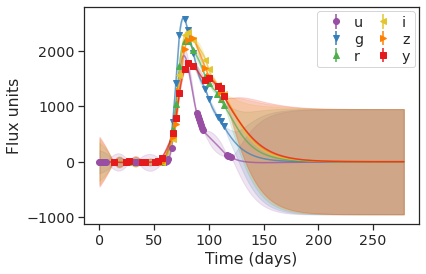

In [15]:
obj_show = '7033'
sndata.PlasticcData.plot_obj_and_model(dataset.data[obj_show], 
                                       dataset.models[obj_show])

[Go back to top.](#index)

*Previous notebook:* [2_preprocess_data](2_preprocess_data.ipynb)

**Next notebook:** [4_augment_data](4_augment_data.ipynb)